# **Exercice 1 Keras :**

**A. Questions:**

1- Quelle sera la taille de sortie d’une couche de convolution avec 8 filtres de taille (5,5), sans padding, de stride s=1 pour une entrée de taille 32×32×3 ?

Output size: $   (32 - 5 + 1) \times (32 - 5 + 1) \times 8 = 28 \times 28 \times 8   $.


2- Combien y a-t-il de poids à apprendre ?

Weights per filter: $   5 \times 5 \times 3 = 75   $ (kernel size times input channels).
Total weights for 8 filters: $   75 \times 8 = 600   $.
Plus bias per filter: $   8   $.
Total: $   600 + 8 = 608   $.


3- Combien de poids aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de la même taille ?

Input size: $   32 \times 32 \times 3 = 3072   $.
Output size: $   28 \times 28 \times 8 = 6272   $.
Total weights: $   3072 \times 6272 = 19,266,944   $, plus biases $   6272   $, totaling $   19,273,216   $.


4- Quels avantages apporte la convolution par rapport à des couches fully-connected ?

Convolution réduit le nombre de paramètres, améliore l'efficacité et réduit le surapprentissage. Elle capture les hiérarchies spatiales et les motifs locaux dans les images grâce au partage de paramètres et à l'invariance par translation.

**B. Implémentation sur colab en utilisant Keras**

In [11]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Step 1: Load Data and visualization

In [14]:
# Importer la base de données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
# Distribution des classes
class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Distribution des classes dans l'ensemble d'entraînement:")
print(class_distribution)

Distribution des classes dans l'ensemble d'entraînement:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


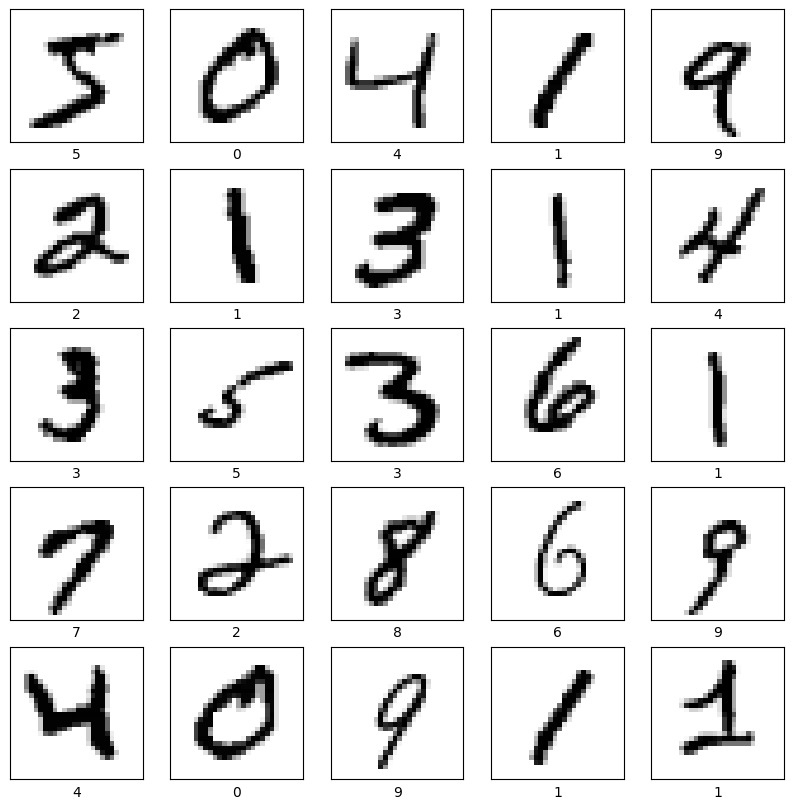

In [17]:
# Un échantillon d'images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [18]:
# Prétraitement des données
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Step 2: Model designing

In [19]:
# Régler les hyperparamètres
batch_size = 64
epochs = 10
optimizer = 'adam'
loss = 'categorical_crossentropy'

In [20]:
# Compléter le modèle CNN avec les couches suivantes:
model = keras.Sequential([
    # conv1: 32 convolutions 5×5, suivie de ReLU
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    # pool1: max-pooling 2×2
    layers.MaxPooling2D((2, 2)),
    # conv2: 64 convolutions 5×5, suivie de ReLU
    layers.Conv2D(64, (5, 5), activation='relu'),
    # pool2: max-pooling 2×2
    layers.MaxPooling2D((2, 2)),
    # conv3: 64 convolutions 3×3 (ajusté pour éviter dimension négative), suivie de ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten pour passer aux couches fully-connected
    layers.Flatten(),
    # fc4: fully-connected, 100 neurones en sortie, suivie de ReLU
    layers.Dense(100, activation='relu'),
    # fc5: fully-connected, 10 neurones en sortie, suivie de softmax
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compiler le modèle
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,734 (452.09 KB)

 Trainable params: 115,734 (452.09 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Train

In [23]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8542 - loss: 0.4678 - val_accuracy: 0.9796 - val_loss: 0.0653
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9797 - loss: 0.0627 - val_accuracy: 0.9843 - val_loss: 0.0514
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9881 - val_loss: 0.0420
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9914 - loss: 0.0297 - val_accuracy: 0.9860 - val_loss: 0.0438
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9946 - loss: 0.0162 - val_accuracy: 0.9883 - val_loss: 0.0395
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9959 - loss: 0.0136 - 

Step 4: Test

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Précision sur l\'ensemble de test: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9870 - loss: 0.0405
Précision sur l'ensemble de test: 0.9894


Visualisations des résultats

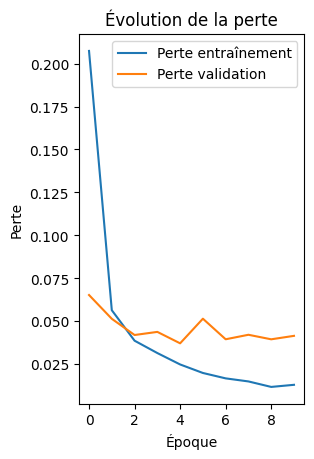

In [25]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Évolution de la perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

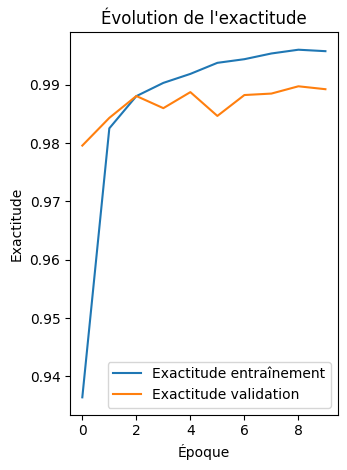

In [26]:
# Courbe d'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitude entraînement')
plt.plot(history.history['val_accuracy'], label='Exactitude validation')
plt.title('Évolution de l\'exactitude')
plt.xlabel('Époque')
plt.ylabel('Exactitude')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


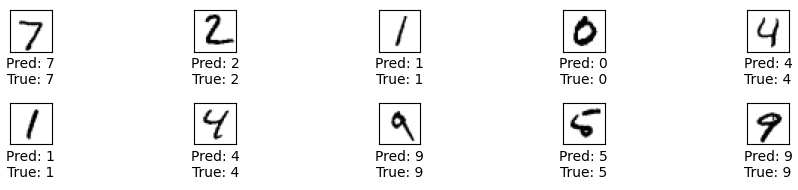

In [27]:
# Visualisation des prédictions sur un échantillon de test
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}')
plt.tight_layout()
plt.show()

# **Exercice 2 Pytorch :**

In [43]:
# Importation des bibliothèques nécessaires
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Vérifier si GPU est disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Step 1: Load Data and visualization

In [45]:
# Charger la base de données MNIST avec torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='/content/data/MNIST', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='/content/data/MNIST', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.48MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.89MB/s]


In [46]:
# DataLoader pour batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [47]:
# Distribution des classes dans l'ensemble d'entraînement
y_train = np.array([label for _, label in train_dataset])
class_distribution = pd.Series(y_train).value_counts().sort_index()
print("Distribution des classes dans l'ensemble d'entraînement:")
print(class_distribution)

Distribution des classes dans l'ensemble d'entraînement:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


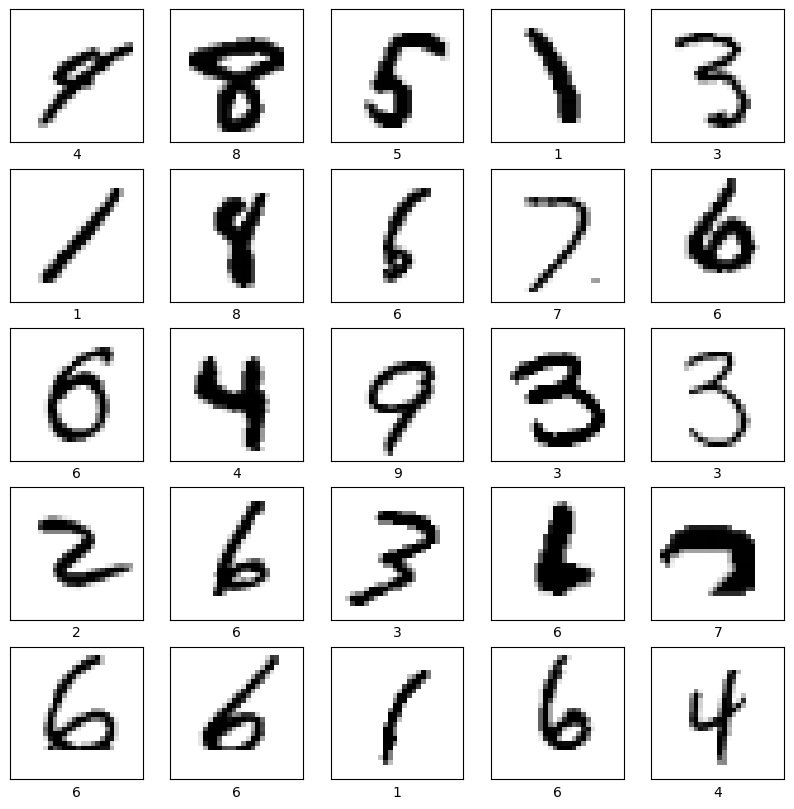

In [48]:
# Afficher un échantillon d'images
data_iter = iter(train_loader)
images, labels = next(data_iter)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i][0], cmap=plt.cm.binary)
    plt.xlabel(labels[i].item())
plt.show()

Step 2: Model designing

In [49]:
# Définir le modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # conv1: 32 convolutions 5×5, suivie de ReLU
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)  # 28x28 -> 28x28
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)       # 14x14
        # conv2: 64 convolutions 5×5, suivie de ReLU
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2) # 14x14 -> 14x14
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)       # 7x7
        # conv3: 64 convolutions 5×5, suivie de ReLU (sans pool3)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=2) # 7x7 -> 7x7
        # fc4: fully-connected, 100 neurones en sortie, suivie de ReLU
        self.fc1 = nn.Linear(64 * 7 * 7, 100)  # Ajusté pour 7x7 après conv3 sans pool3
        # fc5: fully-connected, 10 neurones en sortie
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)

In [50]:
# Optimiseur et perte
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Step 3 : Train

In [51]:
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/10], Loss: 0.1481
Epoch [2/10], Loss: 0.0402
Epoch [3/10], Loss: 0.0275
Epoch [4/10], Loss: 0.0214
Epoch [5/10], Loss: 0.0171
Epoch [6/10], Loss: 0.0149
Epoch [7/10], Loss: 0.0121
Epoch [8/10], Loss: 0.0115
Epoch [9/10], Loss: 0.0108
Epoch [10/10], Loss: 0.0081


Step 4 : Test

In [52]:
model.eval()
correct = 0
total = 0
test_losses = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Précision sur l\'ensemble de test: {100 * correct / total:.2f}%')

Précision sur l'ensemble de test: 99.19%


Visualisations des résultats

In [53]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

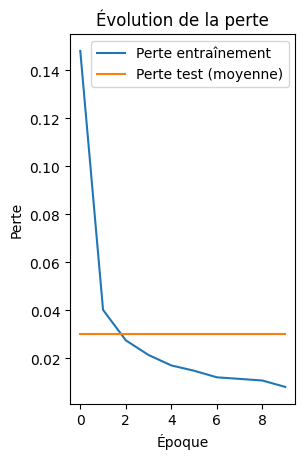

In [54]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Perte entraînement')
plt.plot([sum(test_losses)/len(test_losses)] * len(train_losses), label='Perte test (moyenne)')
plt.title('Évolution de la perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

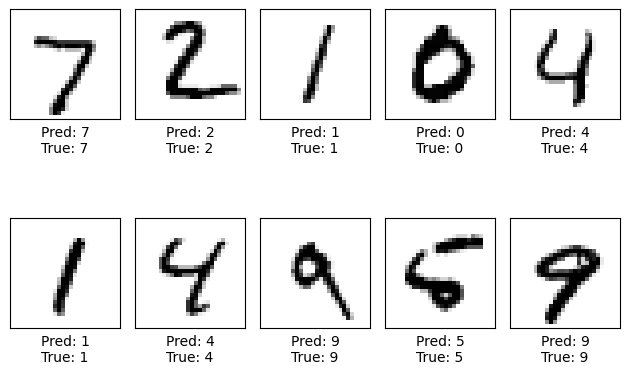

In [58]:
# Visualisation des prédictions sur un échantillon de test
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].cpu().numpy().squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {predicted[i]}\nTrue: {labels[i]}')
plt.tight_layout()
plt.show()